# DD2424 Deep Learning in Data Science
## Assignment 3

### Imports

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm

In [2]:
import numpy as np
from data import *
from utils import *
from layers.model import Model
from layers.activations import ReLU, Softmax
from layers.dense import Dense
from layers.batchnormalization import BatchNormalization

### Load data

In [3]:
X_train, Y_train, y = load_data('data_batch_1')
X_mean = np.mean(X_train, axis=1).reshape(X_train.shape[0], 1)
X_std = np.std(X_train, axis=1).reshape(X_train.shape[0], 1)
X_train = normalize(X_train, X_mean, X_std)

assert np.allclose(np.mean(X_train, axis=1).reshape(X_train.shape[0], 1), np.zeros((X_train.shape[0], 1))), \
    "Check normalization, mean should be 0 "
assert np.allclose(np.std(X_train, axis=1).reshape(X_train.shape[0], 1), np.ones((X_train.shape[0], 1))), \
    "Check normalization, std should be 1"

X_val, Y_val, _ = load_data('data_batch_2')
X_test, Y_test, _ = load_data('test_batch')
X_val = normalize(X_val, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)

BATCH_SIZE = 20
batch = X_train[:, :BATCH_SIZE], Y_train[:, :BATCH_SIZE]

In [4]:
X_train.shape

(3072, 10000)

## Exercise 1
Upgrade assignment 2 code to train & test k-layer networks

#### Two-layer network
Checking the gradients

In [5]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [6]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [7]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [8]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
1.7361976439866922e-10


#### Three-layer network
Checking the gradients

In [5]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [6]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [7]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [8]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
1.7361976439866922e-10


#### Four-layer network
Checking the gradients

In [5]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 30))
classifier.add(ReLU())
classifier.add(Dense(30, 10))
classifier.add(Softmax())

In [6]:
gradients, _ = classifier.compute_gradients(*batch, 0)
gradients = list(reversed(gradients))

In [7]:
kernel_gradients_num, bias_gradients_num, _, _ = classifier.compute_gradients_num(*batch, 0)

In [8]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))

print(equal)
print(threshold)

True
1.7361976439866922e-10


## Exercise 2
Can I train multi-layer networks?

#### Two-layer network
Replicate assignment 2 results (~46.66%)

In [9]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

In [10]:
ns = 500
k = 3

loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, k=k, ns=ns, reg_lambda=0.01)

classifier.accuracy(X_test, Y_test)

100%|██████████| 30/30 [00:44<00:00,  1.48s/it]


0.4706

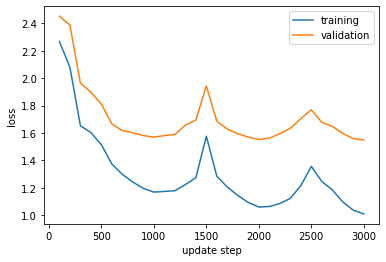

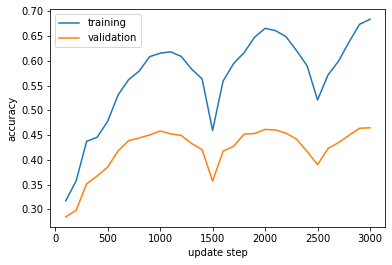

In [11]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='two-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='two-layer-basic')

#### Three-layer network

In [12]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

Load all the data for better results

In [13]:
X_train, Y_train, y = load_all_data()
X_mean = np.mean(X_train, axis=1).reshape(X_train.shape[0], 1)
X_std = np.std(X_train, axis=1).reshape(X_train.shape[0], 1)
X_train = normalize(X_train, X_mean, X_std)

assert np.allclose(np.mean(X_train, axis=1).reshape(X_train.shape[0], 1), np.zeros((X_train.shape[0], 1))), \
    "Check normalization, mean should be 0 "
assert np.allclose(np.std(X_train, axis=1).reshape(X_train.shape[0], 1), np.ones((X_train.shape[0], 1))), \
    "Check normalization, std should be 1"

X_val, Y_val, _ = load_all_data(validation=True)
X_test, Y_test, _ = load_data('test_batch')
X_val = normalize(X_val, X_mean, X_std)
X_test = normalize(X_test, X_mean, X_std)

Suggested hyperparameters

In [14]:
n_batch = 100
eta_min = 1e-5
eta_max = 1e-1
lambda_ = 0.005
k = 2
ns = int(5 * 45_000 / n_batch)

In [15]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:58<00:00,  9.93s/it]


0.5271

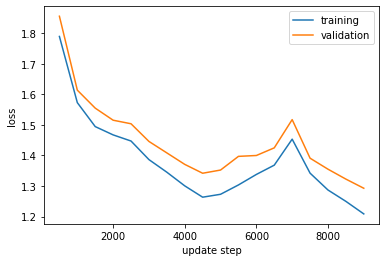

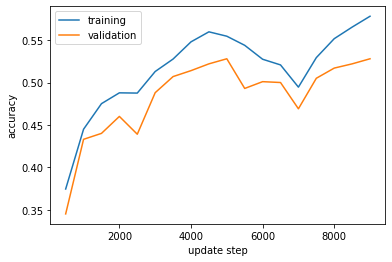

In [16]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='three-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='three-layer-basic')

#### Nine-layer network

In [17]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [18]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:31<00:00,  8.40s/it]


0.4659

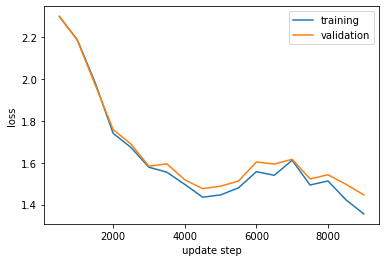

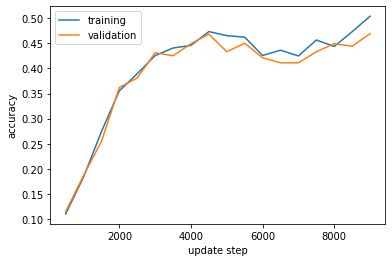

In [19]:
steps = 2 * ns * k

train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

train_validation_error(*loss, label='loss', steps=steps, save='nine-layer-basic')
train_validation_error(*accuracy, label='accuracy', steps=steps, save='nine-layer-basic')

## Exercise 3
Implement batch normalization

#### Three-layer network

In [20]:
classifier = Model()
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
classifier.add(Dense(50, 10))
classifier.add(Softmax())

Checking the gradients

In [21]:
dense_gradients, batch_gradients = classifier.compute_gradients(*batch, 0)
dense_gradients = list(reversed(dense_gradients))
batch_gradients = list(reversed(batch_gradients))

In [22]:
kernel_gradients_num, bias_gradients_num, gamma_gradients_num, beta_gradients_num = classifier.compute_gradients_num(*batch, 0)

In [23]:
equal = True
threshold = 0

for i, (grad_kernel, grad_bias) in enumerate(dense_gradients):
    grad_kernel_num = kernel_gradients_num[i]
    grad_bias_num = bias_gradients_num[i]
    
    equal = equal and np.allclose(grad_kernel[:10, :], grad_kernel_num[:10, :], rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_bias, grad_bias_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_kernel[:10, :] - grad_kernel_num[:10, :])))
    threshold = max(threshold, np.max(np.abs(grad_bias - grad_bias_num)))
    
for i, (grad_gamma, grad_beta) in enumerate(batch_gradients):
    grad_gamma_num = gamma_gradients_num[i]
    grad_beta_num = beta_gradients_num[i]
    
    equal = equal and np.allclose(grad_gamma, grad_gamma_num, rtol=1e-6, atol=1e-6)
    equal = equal and np.allclose(grad_beta, grad_beta_num, rtol=1e-6, atol=1e-6)
    
    threshold = max(threshold, np.max(np.abs(grad_gamma - grad_gamma_num)))
    threshold = max(threshold, np.max(np.abs(grad_beta - grad_beta_num)))

print(equal)
print(threshold)

True
1.0758189478154989e-10


In [24]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [02:26<00:00,  8.16s/it]


0.5316

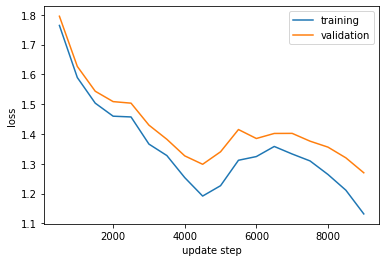

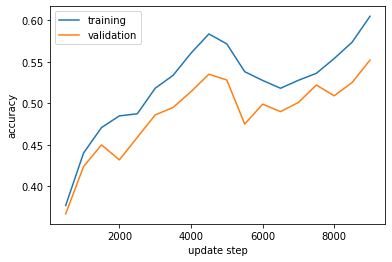

In [25]:
steps = 2 * ns * k
train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)

##### Tuning lambda
Coarse search

In [28]:
reg_lambda = [10 ** l for l in np.linspace(-5, -1, 5)]

for i in reg_lambda:
    classifier.initialize_weights()
    classifier.fit(X_train, Y_train, k=k, ns=ns, reg_lambda=i)
    print(f"Accuracy for regularization lambda={i}: {classifier.accuracy(X_test, Y_test)*100}%")

  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=1e-05: 51.53%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.0001: 51.790000000000006%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.001: 52.87%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.01: 52.949999999999996%


100%|██████████| 18/18 [02:12<00:00,  7.38s/it]


Accuracy for regularization lambda=0.1: 45.85%


Fine search

In [29]:
reg_lambda = [10 ** l for l in np.linspace(-3, -1.5, 10)]

for i in reg_lambda:
    classifier.initialize_weights()
    classifier.fit(X_train, Y_train, k=k, ns=ns, reg_lambda=i)
    print(f"Accuracy for regularization lambda={i}: {classifier.accuracy(X_test, Y_test)*100}%")

  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.001: 52.87%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.0014677992676220691: 52.83%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.0021544346900318843: 53.02%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.0031622776601683794: 53.510000000000005%


  0%|          | 0/18 [00:00<?, ?it/s]

Accuracy for regularization lambda=0.004641588833612777: 53.92%


 67%|██████▋   | 12/18 [01:34<00:47,  7.87s/it]


KeyboardInterrupt: 

#### Nine-layer network

In [30]:
classifier = Model()
# Layer 1
classifier.add(Dense(X_train.shape[0], 50))
classifier.add(BatchNormalization(50))
classifier.add(ReLU())
# Layer 2
classifier.add(Dense(50, 30))
classifier.add(BatchNormalization(30))
classifier.add(ReLU())
# Layer 3
classifier.add(Dense(30, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 4
classifier.add(Dense(20, 20))
classifier.add(BatchNormalization(20))
classifier.add(ReLU())
# Layer 5
classifier.add(Dense(20, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 6
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 7
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 8
classifier.add(Dense(10, 10))
classifier.add(BatchNormalization(10))
classifier.add(ReLU())
# Layer 9
classifier.add(Dense(10, 10))
classifier.add(Softmax())

In [31]:
loss, accuracy = classifier.fit(X_train, Y_train, X_val, Y_val, ns=ns, k=k, reg_lambda=lambda_)

classifier.accuracy(X_test, Y_test)

100%|██████████| 18/18 [03:16<00:00, 10.91s/it]


0.5158

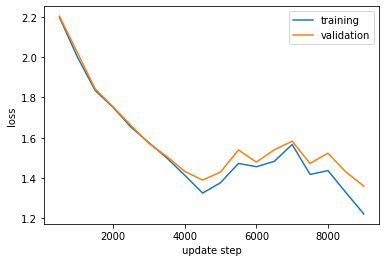

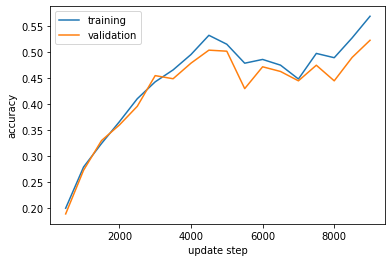

In [32]:
steps = 2 * ns * k
train_validation_error(*loss, label='loss', steps=steps)
train_validation_error(*accuracy, label='accuracy', steps=steps)